In [1]:
# Función para descargar los datos en un archivo .tgz y descomprimirlo a .csv

import os 
import tarfile
import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
# Función para descargar los datos en Pandas

import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

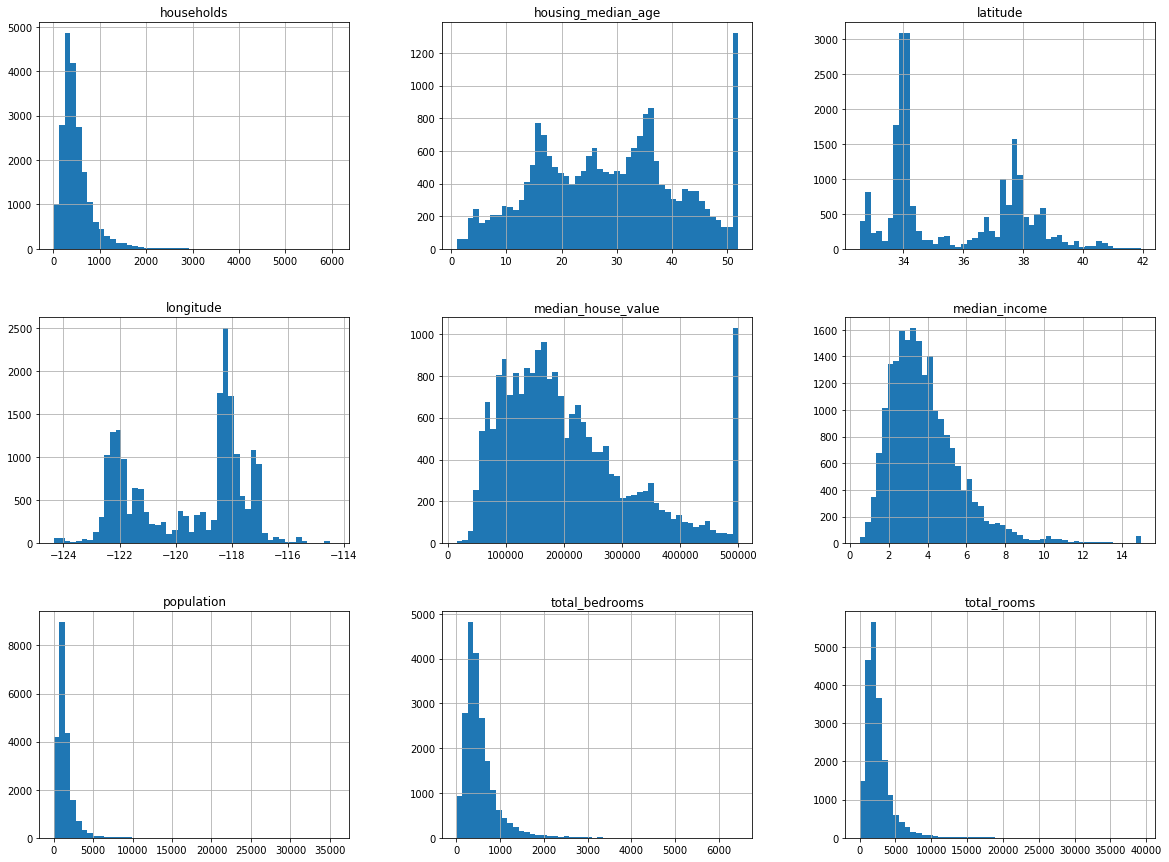

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state = 42)

## What if the data has to be statified?

In [11]:
import numpy as np
housing['income_cat'] = pd.cut(housing.median_income,
                              bins= [0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels= [1,2,3,4,5])

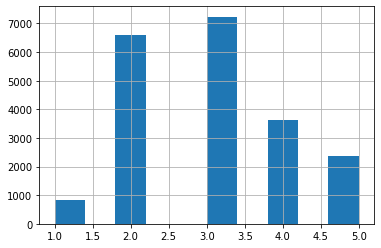

In [12]:
housing.income_cat.hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.income_cat.value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [15]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
10970       <1H OCEAN          4  
20351       <1H OCEAN          3  
6568           INLAND          3  
13285          INLAND          3

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis= 1, inplace= True)

In [17]:
strat_test_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   

      ocean_proximity  
5241        <1H OCEAN  
10970       <1H OCEAN  
20351       <1H OCEAN  
6568           INLAND  
13285          INLAND

In [18]:
housing = strat_train_set.copy()

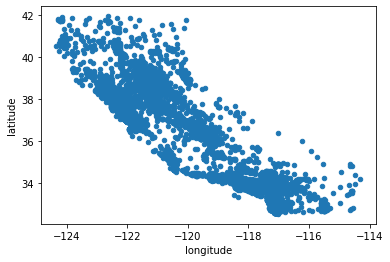

In [19]:
housing.plot(kind='scatter', x='longitude', y='latitude')

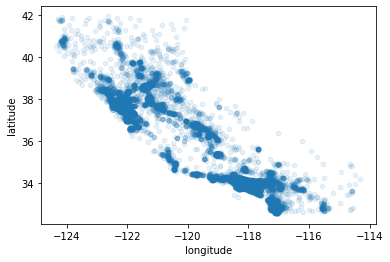

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha= 0.1)

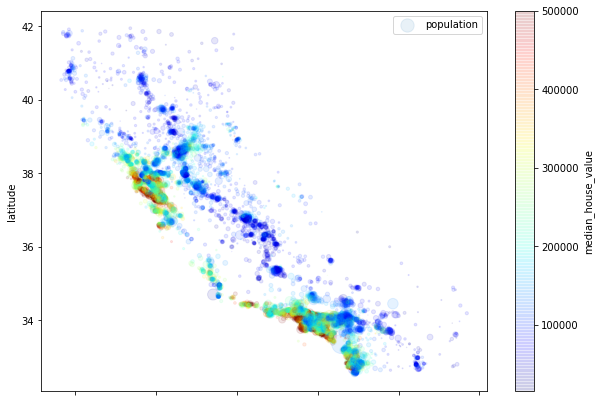

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
            s= housing.population/100, label='population', figsize=(10,7),
            c= 'median_house_value', cmap=plt.get_cmap('jet'), colorbar= True)
plt.legend()

In [22]:
corr_matrix = housing.corr()

In [23]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b263e0668>,
      dtype=object)

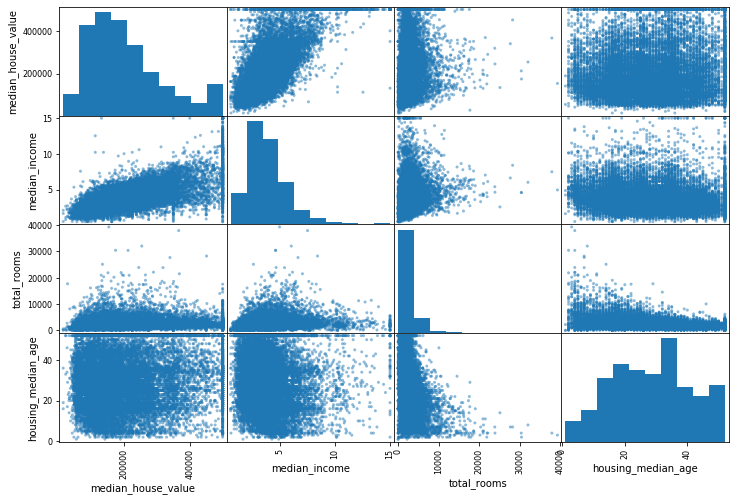

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize= (12,8))

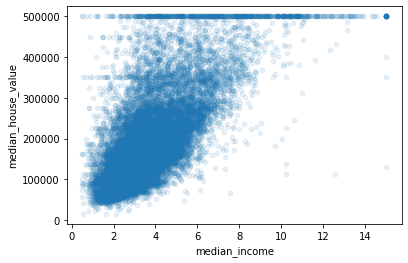

In [25]:
housing.plot(kind= 'scatter', x='median_income', y= 'median_house_value', alpha= 0.1)

In [26]:
housing['rooms_per_household'] = housing.total_rooms/ housing.households
housing['bedrooms_per_room'] = housing.total_bedrooms/ housing.total_rooms
housing['population_per_household'] = housing.population/ housing.households

In [27]:
corr_matrix= housing.corr()
corr_matrix.median_house_value.sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [28]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set.median_house_value.copy()

# Strategies for dealing with missing values

Option 1: Get rid of the corresponding districts

`housing.dropna(subset=['total_bedrooms'])`


Option 2: Get rid of the whole attribute

`housing.drop('total_bedrooms', axis=1)`


Option 3: Set the values to some value (zero, mean, median, etc)

`median = housing['total_bedrooms'].median()`

`housing.total_bedrooms.fillna(median, inplace= True)`

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy= 'median')

In [30]:
housing_num = housing.drop('ocean_proximity', axis= 1)

In [31]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [32]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [33]:
# Using the imputer to fill the missing values with their respective median
X = imputer.transform(housing_num)

In [34]:
type(X)

numpy.ndarray

In [35]:
housing_tr = pd.DataFrame(X, columns= housing_num.columns, index= housing_num.index)

In [36]:
type(housing_tr)

pandas.core.frame.DataFrame

In [37]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

# Dealing with categorical values

In [38]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## _Dummy_ variables

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [42]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [46]:
type(housing_prepared)

numpy.ndarray

In [47]:
pd.DataFrame(housing_prepared)

0         1         2         3         4         5         6  \
0     -1.156043  0.771950  0.743331 -0.493234 -0.445438 -0.636211 -0.420698   
1     -1.176025  0.659695 -1.165317 -0.908967 -1.036928 -0.998331 -1.022227   
2      1.186849 -1.342183  0.186642 -0.313660 -0.153345 -0.433639 -0.093318   
3     -0.017068  0.313576 -0.290520 -0.362762 -0.396756  0.036041 -0.383436   
4      0.492474 -0.659299 -0.926736  1.856193  2.412211  2.724154  2.570975   
...         ...       ...       ...       ...       ...       ...       ...   
16507  0.722267 -0.673331  1.379547 -0.632123 -0.725361 -0.759010 -0.764049   
16508  1.007011 -0.823004  0.902385 -0.667196 -0.584183 -0.329664 -0.636291   
16509  1.586489 -0.724781 -1.562952  1.043901  0.822735  0.607904  0.713156   
16510  0.782213 -0.851068  0.186642 -0.309919 -0.374849 -0.057178 -0.375451   
16511 -1.435791  0.996459  1.856709  0.220853  0.360253 -0.135159  0.377791   

              7         8         9        10   11   12   13   14   15  
0     -0.614937 -0.312055 -0.086499  0.155318  1.0  0.0  0.0  0.0  0.0  
1      1.336459  0.217683 -0.033534 -0.836289  1.0  0.0  0.0  0.0  0.0  
2     -0.532046 -0.465315 -0.092405  0.422200  0.0  0.0  0.0  0.0  1.0  
3     -1.045566 -0.079661  0.089736 -0.196453  0.0  1.0  0.0  0.0  0.0  
4     -0.441437 -0.357834 -0.004194  0.269928  1.0  0.0  0.0  0.0  0.0  
...         ...       ...       ...       ...  ...  ...  ...  ...  ...  
16507  0.554158  0.234352 -0.031755 -0.428853  0.0  1.0  0.0  0.0  0.0  
16508 -0.948815 -0.308114  0.084689  0.491503  0.0  1.0  0.0  0.0  0.0  
16509 -0.316705  0.346934 -0.030554 -0.521776  0.0  1.0  0.0  0.0  0.0  
16510  0.098121  0.024995  0.061509 -0.303407  1.0  0.0  0.0  0.0  0.0  
16511 -0.157799 -0.228529 -0.095863  0.101806  0.0  0.0  0.0  1.0  0.0  

[16512 rows x 16 columns]

In [48]:
pd.DataFrame(housing_prepared).describe()

0             1             2             3             4   \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -4.353107e-15  2.284564e-15 -4.701235e-17  7.587062e-17  1.360615e-16   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -2.384937e+00 -1.449760e+00 -2.199168e+00 -1.223689e+00 -1.294944e+00   
25%   -1.111083e+00 -7.949406e-01 -8.472092e-01 -5.516890e-01 -5.793145e-01   
50%    5.324379e-01 -6.452675e-01  2.758786e-02 -2.353301e-01 -2.458409e-01   
75%    7.822131e-01  9.730728e-01  6.638039e-01  2.423650e-01  2.604547e-01   
max    2.630550e+00  2.951564e+00  1.856709e+00  1.716114e+01  1.381603e+01   

                 5             6             7             8             9   \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -3.700743e-17  2.078979e-17 -2.102108e-16  8.014691e-17 -1.621765e-17   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.269921e+00 -1.317668e+00 -1.772116e+00 -1.650273e+00 -2.075303e-01   
25%   -5.698825e-01 -5.803963e-01 -6.870806e-01 -3.822514e-01 -5.741738e-02   
50%   -2.292746e-01 -2.370459e-01 -1.756999e-01 -7.966522e-02 -2.406537e-02   
75%    2.684162e-01  2.793106e-01  4.561338e-01  2.358755e-01  1.596812e-02   
max    3.071047e+01  1.293803e+01  5.839969e+00  5.225419e+01  1.070603e+02   

                 10            11            12            13            14  \
count  1.651200e+04  16512.000000  16512.000000  16512.000000  16512.000000   
mean  -4.878742e-17      0.440649      0.318738      0.000121      0.111858   
std    1.000030e+00      0.496480      0.466001      0.011005      0.315201   
min   -2.704542e+00      0.000000      0.000000      0.000000      0.000000   
25%   -5.914834e-01      0.000000      0.000000      0.000000      0.000000   
50%   -1.628895e-01      0.000000      0.000000      0.000000      0.000000   
75%    4.044268e-01      1.000000      1.000000      0.000000      0.000000   
max    3.975916e+01      1.000000      1.000000      1.000000      1.000000   

                 15  
count  16512.000000  
mean       0.128634  
std        0.334804  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

# Training!

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [51]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [52]:
lin_rmse

68628.19819848922

### This error means that the model is underfitting, and we should try a more powerful model.

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [55]:
tree_rmse

0.0

In [56]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring= 'neg_mean_squared_error', cv= 10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [58]:
display_scores(tree_rmse_scores)

Scores: [68212.48305097 66476.64428864 69842.74120745 69480.90919103
 69718.80153779 75675.19832783 70912.34923436 72135.15596705
 77030.40288843 69502.90842655]
Mean: 70898.75941201302
Standard deviation: 3085.0873354126597


In [59]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring= "neg_mean_squared_error", cv= 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798348


In [60]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

/home/kik/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [63]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse = np.sqrt(-scores)

In [64]:
forest_rmse

array([52446.180534  , 49853.57402862, 52078.98230428, 55244.19246602,
       52443.48343259, 56349.52982964, 52080.62372336, 50132.78741005,
       55015.63269419, 51960.33792548])

In [65]:
display_scores(forest_rmse)

Scores: [52446.180534   49853.57402862 52078.98230428 55244.19246602
 52443.48343259 56349.52982964 52080.62372336 50132.78741005
 55015.63269419 51960.33792548]
Mean: 52760.532434823144
Standard deviation: 2031.1778011189817


## Fine Tune the model

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [68]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [71]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64550.01084077588 {'max_features': 2, 'n_estimators': 3}
55499.48176784461 {'max_features': 2, 'n_estimators': 10}
52707.92824305976 {'max_features': 2, 'n_estimators': 30}
59968.788207379155 {'max_features': 4, 'n_estimators': 3}
52607.68123203577 {'max_features': 4, 'n_estimators': 10}
50444.77374226214 {'max_features': 4, 'n_estimators': 30}
59433.23286111723 {'max_features': 6, 'n_estimators': 3}
52044.443499657034 {'max_features': 6, 'n_estimators': 10}
50168.19057656092 {'max_features': 6, 'n_estimators': 30}
58946.31618568109 {'max_features': 8, 'n_estimators': 3}
51618.16866796302 {'max_features': 8, 'n_estimators': 10}
49980.11552206741 {'max_features': 8, 'n_estimators': 30}
62177.99503023894 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54703.051207184246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60526.122302841366 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53031.31461837993 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [73]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



In [72]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.73295719e-02, 6.20271359e-02, 4.28943371e-02, 1.55824407e-02,
       1.49141754e-02, 1.44365048e-02, 1.42337729e-02, 3.94228301e-01,
       4.73945894e-02, 1.08473924e-01, 5.59918122e-02, 8.30913981e-03,
       1.48768277e-01, 5.95066478e-05, 2.41254417e-03, 2.94396796e-03])

In [74]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.39422830071432685, 'median_income'),
 (0.14876827671996123, 'INLAND'),
 (0.10847392355758848, 'pop_per_hhold'),
 (0.06732957193455255, 'longitude'),
 (0.06202713589999416, 'latitude'),
 (0.055991812222362936, 'bedrooms_per_room'),
 (0.04739458942995197, 'rooms_per_hhold'),
 (0.04289433708714732, 'housing_median_age'),
 (0.015582440669298769, 'total_rooms'),
 (0.014914175435306877, 'total_bedrooms'),
 (0.014436504790258676, 'population'),
 (0.014233772949168076, 'households'),
 (0.008309139807981389, '<1H OCEAN'),
 (0.0029439679605022502, 'NEAR OCEAN'),
 (0.002412544173835614, 'NEAR BAY'),
 (5.950664776282033e-05, 'ISLAND')]

# Evaluate Model on the Test Set

In [75]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [76]:
final_rmse

47873.89468471278